In [227]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [149]:
# loding data
covid = pd.read_csv('covid_19_india.csv')


In [148]:
# Exploring data
covid.head()

,date,time,state,cured,deaths,confirmed
18094,2021-08-11,8:00 AM,Maharashtra,6159676,134201,6363442
18058,2021-08-10,8:00 AM,Maharashtra,6151956,134064,6357833
18022,2021-08-09,8:00 AM,Maharashtra,6144388,133996,6353328
17986,2021-08-08,8:00 AM,Maharashtra,6139493,133845,6347820
17950,2021-08-07,8:00 AM,Maharashtra,6130137,133717,6341759


In [150]:
# Data modify
covid = covid[['Date', 'Time', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed']]
covid.columns = ['date', 'time', 'state', 'cured', 'deaths', 'confirmed']

In [44]:
covid.shape

(18110, 9)

In [72]:
covid.head()

,date,time,state,cured,deaths,confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [71]:
#checking last cases
covid.tail()

,date,time,state,cured,deaths,confirmed
18105,2021-08-11,8:00 AM,Telangana,638410,3831,650353
18106,2021-08-11,8:00 AM,Tripura,77811,773,80660
18107,2021-08-11,8:00 AM,Uttarakhand,334650,7368,342462
18108,2021-08-11,8:00 AM,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,8:00 AM,West Bengal,1506532,18252,1534999


In [90]:
#checking last date cases b
last_date = covid[covid.date=='2021-08-11']

In [93]:
last_date

,date,time,state,cured,deaths,confirmed
18074,2021-08-11,8:00 AM,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,8:00 AM,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,8:00 AM,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,8:00 AM,Assam,559684,5420,576149
18078,2021-08-11,8:00 AM,Bihar,715352,9646,725279
18079,2021-08-11,8:00 AM,Chandigarh,61150,811,61992
18080,2021-08-11,8:00 AM,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,8:00 AM,Delhi,1411280,25068,1436852
18083,2021-08-11,8:00 AM,Goa,167978,3164,172085


In [97]:
# max confirm case
MaxConfirmCase = last_date.sort_values('confirmed',  ascending = False)

MaxConfirmCase

,date,time,state,cured,deaths,confirmed
18094,2021-08-11,8:00 AM,Maharashtra,6159676,134201,6363442
18090,2021-08-11,8:00 AM,Kerala,3396184,18004,3586693
18089,2021-08-11,8:00 AM,Karnataka,2861499,36848,2921049
18104,2021-08-11,8:00 AM,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,8:00 AM,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,8:00 AM,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,8:00 AM,West Bengal,1506532,18252,1534999
18082,2021-08-11,8:00 AM,Delhi,1411280,25068,1436852
18080,2021-08-11,8:00 AM,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,8:00 AM,Odisha,972710,6565,988997


In [99]:
top5State = MaxConfirmCase[0:5]

In [100]:
top5State

,date,time,state,cured,deaths,confirmed
18094,2021-08-11,8:00 AM,Maharashtra,6159676,134201,6363442
18090,2021-08-11,8:00 AM,Kerala,3396184,18004,3586693
18089,2021-08-11,8:00 AM,Karnataka,2861499,36848,2921049
18104,2021-08-11,8:00 AM,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,8:00 AM,Andhra Pradesh,1952736,13564,1985182


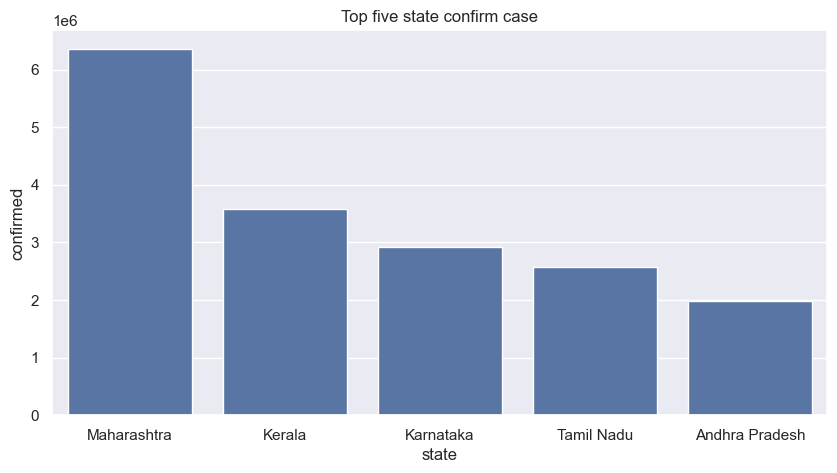

In [123]:
# Bar Plot for max case 
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='state', y='confirmed', data=top5State)
plt.title('Top five state confirm case')
plt.show()


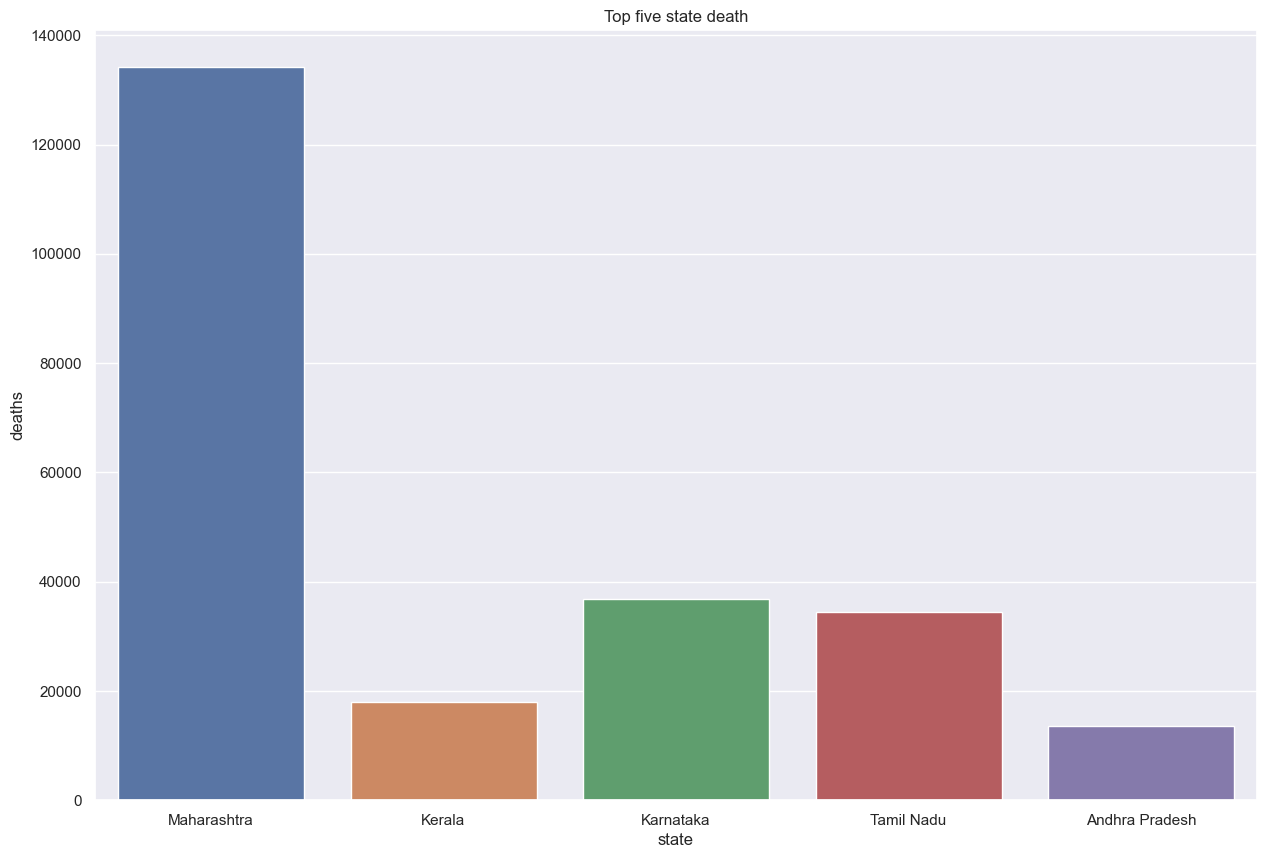

In [138]:
MaxConfirmCaseD = last_date.sort_values('deaths',  ascending = False)

MaxConfirmCaseD


top5StateD = MaxConfirmCase[0:5]


plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(x='state', y='deaths', data=top5StateD, hue = 'state')
plt.title('Top five state death')
plt.show()


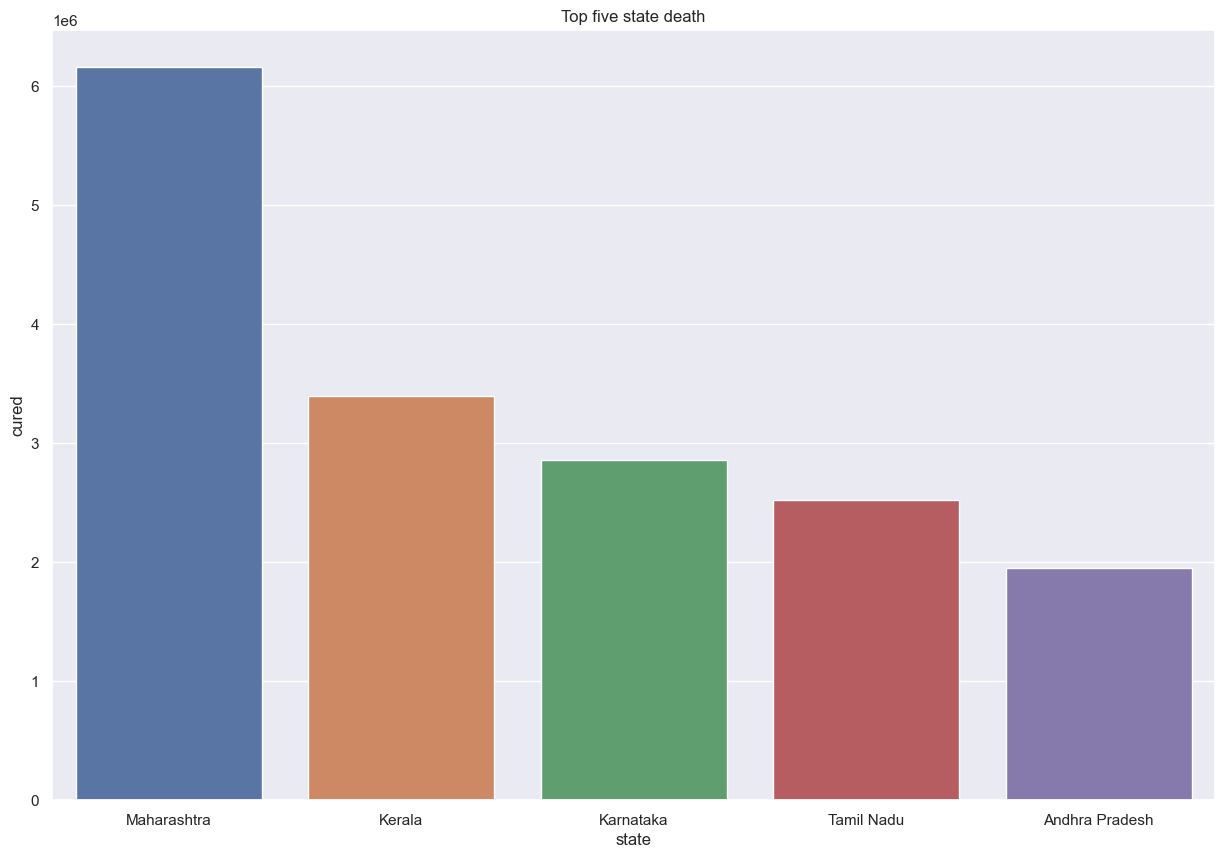

In [140]:
#top 5 state cured data



MaxConfirmCaseC = last_date.sort_values('cured',  ascending = False)

MaxConfirmCaseC


top5StateC = MaxConfirmCase[0:5]


plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(x='state', y='cured', data=top5StateC, hue = 'state')
plt.title('Top five state death')
plt.show()
	

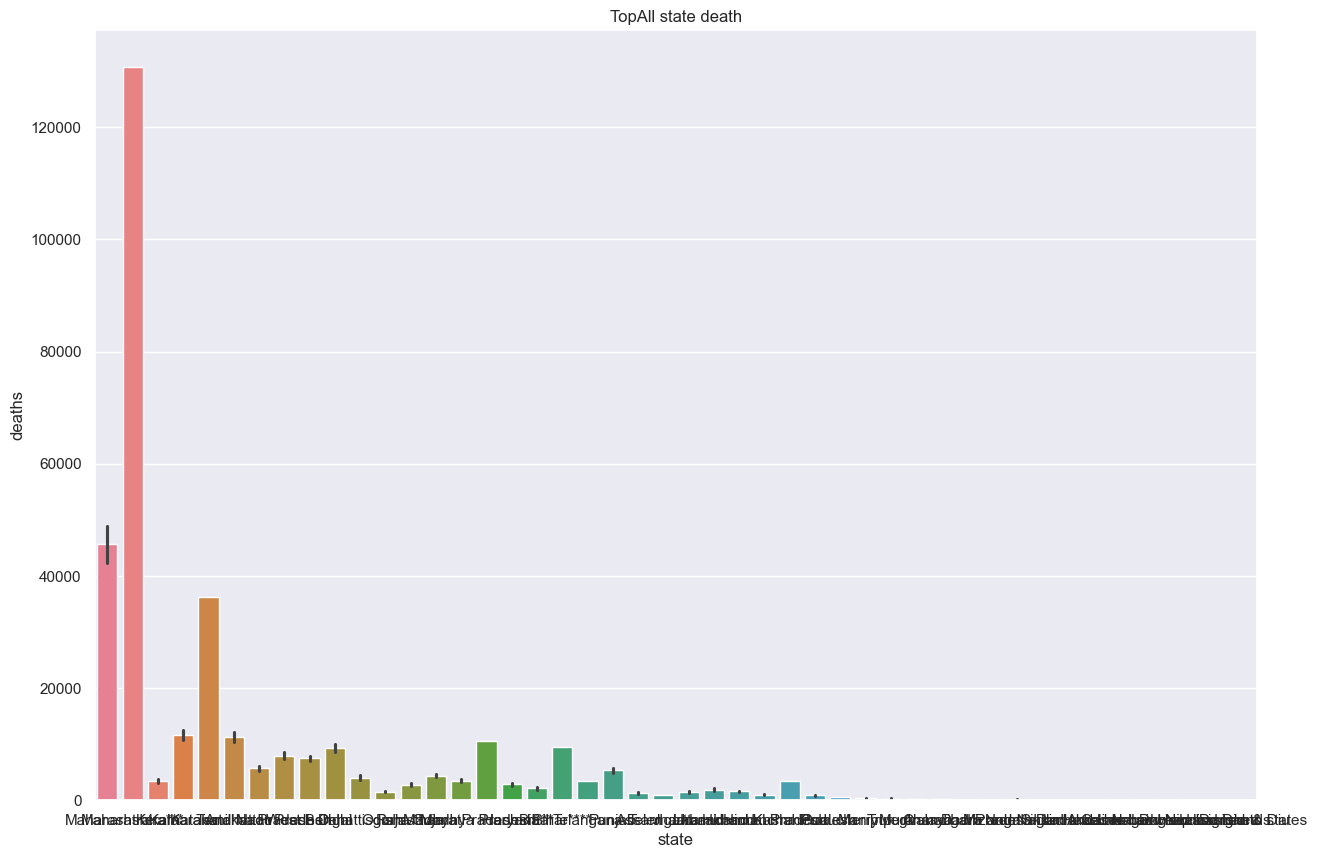

In [141]:
# sns.scatterplot(x='state', y='deaths', data=covid, alpha=0.9, hue ='state')
# plt.title('all state death rate')
# plt.title('Scatter Plot Title', fontsize=20)  # Title size
# plt.xlabel('X-Axis Label', fontsize=16)      # X-axis label size
# plt.ylabel('Y-Axis Label', fontsize=16)      # Y-axis label size
# plt.rcParams['figure.figsize'] = [12, 12]
# plt.show()

covid1 = covid.sort_values('cured',  ascending = False)

covid1


covid = covid1[0:5]


plt.rcParams['figure.figsize'] = [15, 10]
sns.barplot(x='state', y='deaths', data=covid1, hue = 'state')
plt.title('TopAll state death')
plt.show()


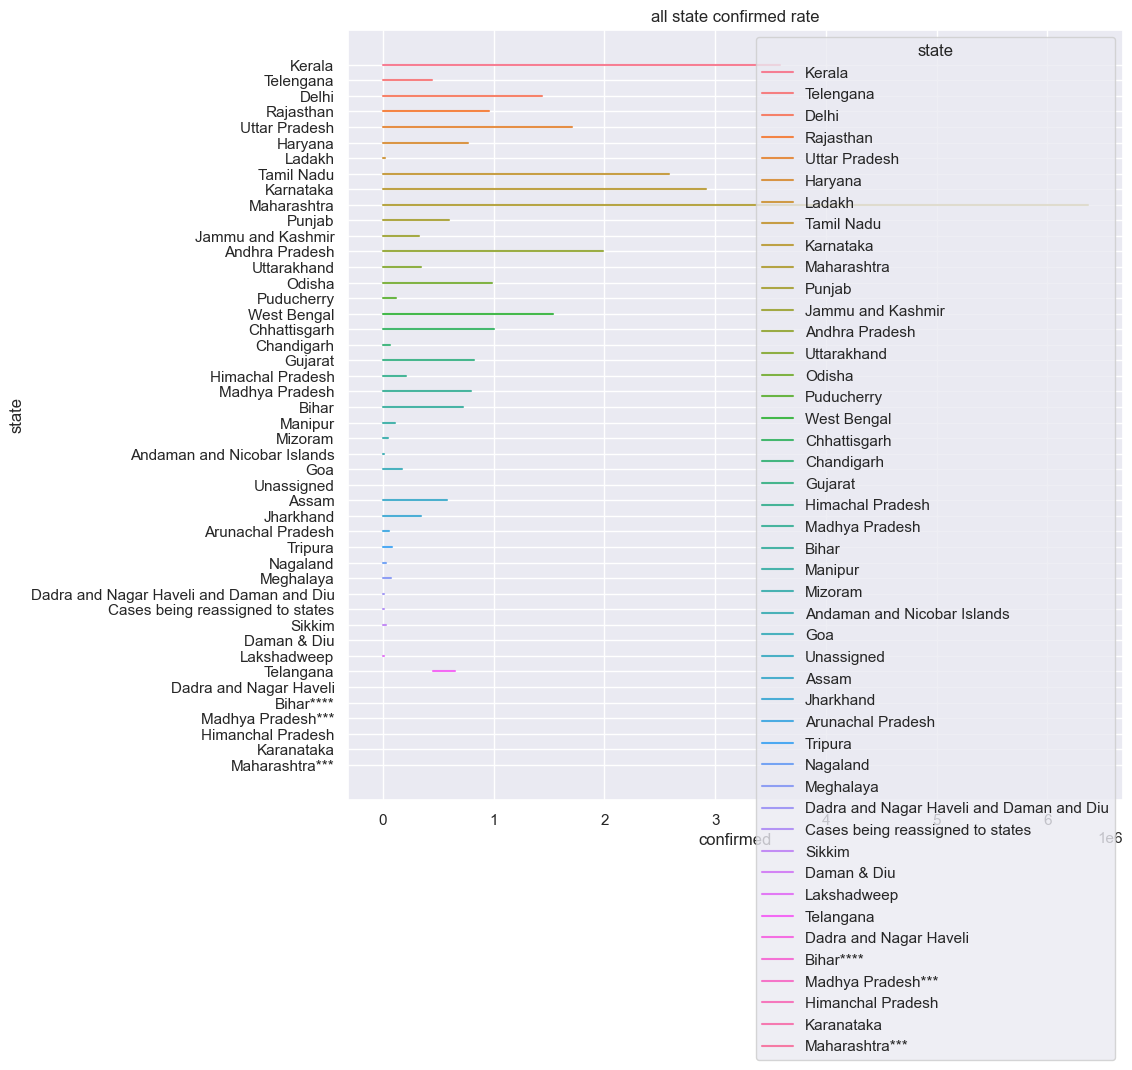

In [158]:


sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='confirmed', y='state', data=covid, alpha=0.9, hue= 'state')
plt.title('all state confirmed rate')

plt.rcParams['figure.figsize'] = [12, 12]
plt.show()

In [143]:
maha=covid[covid.state=='Maharashtra']

In [151]:
maha

,date,time,state,cured,deaths,confirmed
18094,2021-08-11,8:00 AM,Maharashtra,6159676,134201,6363442
18058,2021-08-10,8:00 AM,Maharashtra,6151956,134064,6357833
18022,2021-08-09,8:00 AM,Maharashtra,6144388,133996,6353328
17986,2021-08-08,8:00 AM,Maharashtra,6139493,133845,6347820
17950,2021-08-07,8:00 AM,Maharashtra,6130137,133717,6341759


In [152]:
covid

,date,time,state,cured,deaths,confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
18105,2021-08-11,8:00 AM,Telangana,638410,3831,650353
18106,2021-08-11,8:00 AM,Tripura,77811,773,80660
18107,2021-08-11,8:00 AM,Uttarakhand,334650,7368,342462
18108,2021-08-11,8:00 AM,Uttar Pradesh,1685492,22775,1708812


In [153]:
maha

,date,time,state,cured,deaths,confirmed
18094,2021-08-11,8:00 AM,Maharashtra,6159676,134201,6363442
18058,2021-08-10,8:00 AM,Maharashtra,6151956,134064,6357833
18022,2021-08-09,8:00 AM,Maharashtra,6144388,133996,6353328
17986,2021-08-08,8:00 AM,Maharashtra,6139493,133845,6347820
17950,2021-08-07,8:00 AM,Maharashtra,6130137,133717,6341759


In [166]:
last_date

,date,time,state,cured,deaths,confirmed
18074,2021-08-11,8:00 AM,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,8:00 AM,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,8:00 AM,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,8:00 AM,Assam,559684,5420,576149
18078,2021-08-11,8:00 AM,Bihar,715352,9646,725279
18079,2021-08-11,8:00 AM,Chandigarh,61150,811,61992
18080,2021-08-11,8:00 AM,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,8:00 AM,Delhi,1411280,25068,1436852
18083,2021-08-11,8:00 AM,Goa,167978,3164,172085


In [185]:
 # last_date['date'] =last_date['date'].map[covid.datetime.toordinal]

# Ensure 'date' column is in datetime format

covid['date'] = pd.to_datetime(covid['date'])

# Convert to ordinal values
covid['date_ordinal'] = covid['date'].map(lambda x: x.toordinal())



In [189]:
x=last_date['date']
y=last_date['confirmed']


In [220]:
x_train,x_text,y_train,y_test=train_test_split(x, y, test_size=0.2)

In [221]:
dft=RandomForestRegressor()

In [222]:
x_train

18076   2021-08-11
18088   2021-08-11
18098   2021-08-11
18082   2021-08-11
18109   2021-08-11
18079   2021-08-11
18106   2021-08-11
18100   2021-08-11
18078   2021-08-11
18096   2021-08-11
18108   2021-08-11
18104   2021-08-11
18095   2021-08-11
18074   2021-08-11
18097   2021-08-11
18081   2021-08-11
18107   2021-08-11
18083   2021-08-11
18090   2021-08-11
18093   2021-08-11
18089   2021-08-11
18080   2021-08-11
18086   2021-08-11
18092   2021-08-11
18091   2021-08-11
18105   2021-08-11
18094   2021-08-11
18101   2021-08-11
Name: date, dtype: datetime64[ns]

In [223]:
# covid['date'] = pd.to_datetime(covid['date'])

# # Convert to ordinal values
# covid['date_ordinal'] = covid['date'].map(lambda x: x.toordinal())
y_train

18076      50605
18088     347440
18098      28811
18082    1436852
18109    1534999
18079      61992
18106      80660
18100     121766
18078     725279
18096      69769
18108    1708812
18104    2579130
18095     105424
18074       7548
18097      46320
18081      10654
18107     342462
18083     172085
18090    3586693
18093     791980
18089    2921049
18080    1003356
18086     208616
18092      10263
18091      20411
18105     650353
18094    6363442
18101     599573
Name: confirmed, dtype: int64

In [240]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)


In [241]:


lr.fit(np.array(x_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

LinearRegression()

In [242]:
last_date


,date,time,state,cured,deaths,confirmed,date_ordinal
18074,2021-08-11,8:00 AM,Andaman and Nicobar Islands,7412,129,7548,738013
18075,2021-08-11,8:00 AM,Andhra Pradesh,1952736,13564,1985182,738013
18076,2021-08-11,8:00 AM,Arunachal Pradesh,47821,248,50605,738013
18077,2021-08-11,8:00 AM,Assam,559684,5420,576149,738013
18078,2021-08-11,8:00 AM,Bihar,715352,9646,725279,738013
18079,2021-08-11,8:00 AM,Chandigarh,61150,811,61992,738013
18080,2021-08-11,8:00 AM,Chhattisgarh,988189,13544,1003356,738013
18081,2021-08-11,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654,738013
18082,2021-08-11,8:00 AM,Delhi,1411280,25068,1436852,738013
18083,2021-08-11,8:00 AM,Goa,167978,3164,172085,738013


In [246]:
lr.predict.(np.arra([[2021-08-11]]))

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3380081147.py, line 1)